# Applying the Method Of Manufactured Solutions to SWIRL 

## Introduction

The method of manufactured solutions (MMS) is a general procedure for constructing an analytical solution and determining the accuracy via convergence rate. As a result, MMS serves as a means of code verification. In this work, SWIRL, a code used to calculate the radial modes within an infinitely long duct, is validated using MMS. SWIRL has two components that require numerical techniques and approximation. First, SWIRL accepts a given mean flow and uses numerical integration to obtain the speed of sound.  Secondly, SWIRL constructs a linear matrix equation using the Linearized Euler Equations (LEE) as a function of radius. This work aims to use the Method of Manufactured solutions to reassure that these two steps lead to accurate results.

In [1]:
# Set Up Libraries
%run 01-set-up.ipynb

In [2]:
# Defining the necessary symbolic variables
%run 02-symbolic-variables.ipynb

# Mean Flow Manufactured Solutions
For SWIRL, the absolute bare minimum requirement is to define the correspond-
ing flow components for the domain of interest. SWIRL assumes no flow in the
radial direction, leaving only two other components, axial and tangential for a
3D cylindrical domain. Since SWIRL is also non dimensionalized, the mean flow
components are defined using the Mach number. SWIRL uses the tangential
mach number to obtain the speed of sound using numerical integration. The
speed of sound is then used to find the rest of the primative variables for the
given flow.
The goal is to manufacture functions that will test the numerical integration
used to obtain the speed of sound. This requires a manufactured function for
either the tangential Mach number or the speed of sound.
## Checking if guidelines for creating manufactured solutions are followed

1. smooth, i.e. continuous
2. general enough to exercise each term in the governing equations
3. Enough derivatives to appropriately test scheme
4. bounded by a small constant
5. Make the same assumptions as code (non-dimensional variables, so they
    should not exceed one or be negative)
6. Defined on a connected subset oF 2d/3d space
7. function needs to make sense to the derivatives in the pde


### Theory
#### Aerodynamic Model and the Mean Flow Assumptions

To relate the speed of sound to a given flow, the radial momentum equation
is used.  If the flow contains a swirling component,then the primitive variables 
are nonuniform through the flow, and mean flow assumptions are not valid. 
\begin{align*}
    \frac{\partial v_r}{\partial t} +
    v_r \frac{\partial v_r}{\partial r} + 
    \frac{v_{\theta}}{r} 
    \frac{\partial v_{\theta}}{\partial \theta} -
    \frac{v_{\theta}^2}{r} +
    v_x \frac{\partial v_r}{\partial x} =-
    \frac{1}{\rho}\frac{\partial P}{\partial r}
\end{align*}

 To account to for this, the radial momentum is simplified by assuming the 
 flow is steady, the flow has no radial component. In addition, the viscous
 and body forces are neglected.  Then the radial pressure derivative term is
 set equal to the dynamic pressure term. Seperation of variables is applied.  

 \begin{align*}
     \frac{v_{\theta}^2}{r} = \frac{1}{\rho}\frac{\partial P}{\partial r} \\
 P = \int_{r}^{r_{max}} \frac{\rho V_{\theta}^2}{  r}
 \end{align*}

To show the work, we will start with the dimensional form of the equation and
differentiate both sides.  Applying separation of variables,


$$     \int_{r}^{r_{max}}
     \frac{{\rho} v_{\theta}^2}{r} \partial r 
     =-\int_{P(r)}^{P(r_{max})}\partial p.
$$

CFD codes are often nondimensional to avoid issues 
Since $\tilde{r} = r/r_{max}$,
$$r = \tilde{r}r_{max}.$$
Taking total derivatives (i.e. applying chain rule),
$$dr = d(\tilde{r}r_{max}) = d(\tilde{r})r_{max}, $$
Substituting these back in and evaluating the right hand side,
$$
    \int_{\tilde{r}}^{1} \frac{\bar{\rho} v_{\theta}^2}{\tilde{r}}\partial \tilde{r} 
    =P(1)-P(\tilde{r})
$$

For reference the minimum value of $\tilde{r}$ is,

$$\sigma = \frac{r_{max}}{r_{min}}$$

For the radial derivative, the definition of the speed of sound is utilized,
$$\frac{\partial A^2}{\partial r } =
\frac{\partial}{\partial r} \left( \frac{\gamma P}{\rho} \right).$$

Using the quotient rule, the definition of the speed of sound is extracted,

\begin{align*}
&= \frac{\partial P}{\partial r} \frac{\gamma \bar{\rho}}{\bar{\rho}^2} -
\left(
    \frac{\gamma P}{\bar{\rho}^2} 
\right) 
\frac{\partial \bar{\rho}}{\partial r}\\
&=  \frac{\partial P}{\partial r} \frac{\gamma }{\bar{\rho}} -
\left( \frac{A^2}{\bar{\rho}} \right) 
\frac{\partial \bar{\rho} }{\partial r}
\end{align*}

Using isentropic condition $ \partial P/A^2 = \partial \rho$, 

\begin{align*}
&= \frac{\partial P}{\partial r} \frac{\gamma }{\bar{\rho}} -
\left( \frac{1}{\bar{\rho}} \right) \frac{\partial  P }{\partial r}\\
\frac{\partial A^2}{\partial r} 
&= \frac{\partial P}{\partial r} \frac{\gamma - 1}{\bar{\rho}}  
\end{align*}

\begin{align*}
    \frac{\bar{\rho}}{\gamma -1}\frac{\partial A^2}{\partial r} &= \frac{\partial P}{\partial r} 
\end{align*}

Going back to the radial momentum equation, and rearranging the terms will simplify 
the expression. The following terms are defined to start the
nondimensionalization.  

\begin{align*}
    M_{\theta} &= \frac{V_{\theta}}{A} \\ 
    \widetilde{r} &= \frac{r}{r_{max}}  \\
    \widetilde{A} &= \frac{A}{A_{r,max}}  \\
    A &= \widetilde{A}{A_{r,max}} \\
    r &= \widetilde{r}{r_{max}}\\
    \frac{\partial}{\partial r} &=
    \frac{\partial \widetilde{r}}{\partial r} \frac{\partial}{\partial \widetilde{r}}\\
                                &= \frac{1}{r_{max}}\frac{\partial}{\partial \widetilde{r}}
\end{align*}
Dividing by $A$,
\begin{align*}
    \frac{M_{\theta}^2}{r}\left(\gamma - 1\right) 
 &= \frac{\partial A^2}{\partial r} \frac{1}{A^2}
\end{align*}

Now there is two options, either find the derivative of  $\bar{A}$ or the integral of
$M_{\theta}$ with respect to r.
\begin{enumerate}
    \item
\begin{align*}
\text{Integrating both sides } \int_{r}^{r_{max}}\frac{M_{\theta}}{r}\left(\gamma - 1\right){\partial r}  &=\int_{A^2(r)}^{A^2(r_{max})}\frac{1}{A^2}  {\partial A^2}\\
\int_{r}^{r_{max}}\frac{M^2_{\theta}}{r}\left(\gamma - 1\right){\partial r}  &=ln(A^2(r_{max})) - ln(A^2(r)) \\
\int_{r}^{r_{max}}\frac{M^2_{\theta}}{r}\left(\gamma - 1\right){\partial r}  &=ln\left(\frac{A^2(r_{max})}{A^2(r)}\right) 
\end{align*}

Defining non dimensional speed of sound $\tilde{A} = \frac{A(r)}{A(r_{max})}$
\begin{align*}
\int_{r}^{r_{max}}\frac{M_{\theta}}{r}\left(\gamma - 1\right){\partial r}  &=ln\left(\frac{1}{\tilde{A}^2}\right) \\
&= -2ln(\tilde{A})\\
\tilde{A}(r) &= exp\left[-\int_{r}^{r_{max}}\frac{M_{\theta}}{r}\frac{\left(\gamma - 1\right)}{2}{\partial r}\right] \\ \text{replacing r with }\tilde{r} \rightarrow \tilde{A}(r) &= exp\left[-\int_{r}^{r_{max}}\frac{M_{\theta}}{r}\frac{\left(\gamma - 1\right)}{2}{\partial r}\right]		\\
\tilde{A}(\tilde{r}) &= exp\left[\left(\frac{1 - \gamma}{2}\right)\int_{\tilde{r}}^{1}\frac{M_{\theta}}{\tilde{r}}{\partial \tilde{r}}\right]	
\end{align*}
\item Or we can differentiate
\end{enumerate}
Solving for $M_{\theta}$ ,
\begin{align*}
M_{\theta}^2 
&= \frac{\partial A^2}{\partial r} \frac{r}{A^2 \left(\gamma - 1\right)}
\end{align*}
Nondimensionalizing and substituting, 

\begin{align} 
    M_{\theta}^2
    \frac{\left( \gamma - 1 \right)}{\widetilde{r} r_{max}} &=
    \frac{1}{(\widetilde{A}A_{r,max})^2}\frac{A_{r,max}^2}{r_{max}}
    \frac{\partial \widetilde{A}^2}{\partial \widetilde{r}} \nonumber \\
    M_{\theta}^2     \frac{\left( \gamma - 1 \right)}{\widetilde{r} } &=
    \frac{1}{\widetilde{A}^2}
    \frac{\partial \widetilde{A}^2}{\partial \widetilde{r}} \nonumber \\
    M_{\theta} &= \sqrt{\frac{\widetilde{r}}{(\gamma-1) \widetilde{A}^2}
        \frac{\partial\widetilde{A}^2}{\partial \widetilde{r} }
    } \label{eq:Mthetabackcalculated}
\end{align}


 With these guidelines, a function is specified for the speed of sound to conduct
 a method of manufactured solutions on SWIRL's speed of sound numerical 
 integration. This is checked by observing the tangential mach number 
 produced from the speed of sound and comparing that to the tangential mach number
 that has been analytically defined.

## Tanh Summation Formulation

here are a few constraints and conditions that must be followed in order for the analytical 
function to work with SWIRL, 

\begin{itemize}
    \item The mean flow and speed of sound must be real and positive. This will 
        occur is a speed of sound is chosen such that the tangential mach number
        is imaginary
    \item The derivative of the speed of sound must be positive
    \item Any bounding constants used with the mean flow should not allow the 
        total Mach number to exceed one.
    \item the speed of sound should be one at the outer radius of the cylinder
\end{itemize}

Given these constraints, $tanh(r)$ is chosen as a function since it can be
modified to meet the conditions above. Literature (The tanh method: A tool for 
solving certain classes of nonlinear evolution and wave equations) 
is a paper than demonstrates the strength of using tanh functions.
One additonal benefit of tanh(r) is that it is bounded between one and negative one, i.e.

\begin{itemize}
    \item As r $\rightarrow$ $\infty$ tanh(r) $\rightarrow$ 1
    \item As -r $\rightarrow$ $-\infty$ tanh(r) $\rightarrow$ -1
\end{itemize}

To test the numerical integration method,  $M_{\theta}$ is defined as a result 
of differentiating the speed of sound, $A$. This is done opposed to integrating
$M_{\theta}$ analytically. However, an analytical function can be defined for
$M_{\theta}$, which can then be integrated to find what $\widetilde{A}$ should be. 
Instead, the procedure of choice is to back calculate what the appropriate 
$M_{\theta}$ is for a given expression for $\widetilde{A}$.  Since it is easier 
to take derivatives , we will solve for $M_{\theta}$ using Equation \ref{eq:Mthetabackcalculated} ,

\subsection{Tanh Summaion Formulation}
The goal is generate an MS with a number of stairs that is bounded between
zero and one. Here's what my focus group ideas are,

\begin{align*}
    1 = R + L 
\end{align*}
where, 1 is a constraint, and R and L are the two waves when summed need to cancel 
if it were the exact same amplitude \& opposite sign 

so ,

\begin{align*}
    R + L = \tanh(x) + -\tanh(x) = 0
\end{align*}
or in our case,

\begin{align*}
    R + L = \tanh(x) + -\tanh(x) = 1
\end{align*}

We can tweak this by adding knobs by adding knobs A and B. If we dont want 
the total to not exceed one then, $A_j + A_{j+1} \cdots A_{last} = 1$. $B_1$ changes
the steepnes of the kink that we want. In order to generalize this,


\begin{align*}
    \bar{A} = \sum_{j=1}^n R_{ij} + \sum_{j=1}^n L_{ij} 
\end{align*}
where,
\begin{align*}
    R_{ij} = A_j \tanh(B_j (x_i - x_j)) \\ 
    L_{ij} = A_j \tanh(B_j (x_j - x_n))  
\end{align*}

Letting $n = 3$...

\begin{align*}
    \bar{A} &= S_{vert} + \sum_{j=1}^3 R_{ij} + \sum_{j=1}^3 L_{ij} \\
    \bar{A} &=
     A_1   \tanh(B_1   (x_i - x_1))  + 
     A_{2} \tanh(B_{2} (x_i - x_{2}))  + 
     A_{3} \tanh(B_{3} (x_i - x_3)) +  \\
     A_1   \tanh(B_1   (x_1 - x_n)) &+ 
     A_{2} \tanh(B_{2} (x_2 - x_{n}))  +
     A_{3} \tanh(B_{3} (x_3 - x_n))  
\end{align*}
and,
\begin{align*}
   A_1 = A_2 = A_3 = k_1 \\ 
   B_1 = B_2 = B_3 = k_2  
\end{align*}


The manufactured solutions for the mean flow are determined using a hyperbolic tangent summation method. This method allows the user to create an arbitrary number of hyperbolic tangents equally spaced apart. 

For the mean flow, the function used as an

The general mathematical formulation is as follows,

placeholder

then for some functions we need to impose boundary conditions. We will demonstrate how the careless implementation of a boundary condition can lead to close approximations on the interior.

fairing function place holder 

0.116666666666667*tanh(12.5*r - 12.5) + 0.116666666666667*tanh(12.5*r - 4.5) + 0.883333359591538
1.58113883008419*eta*(1 - gamma/ak)*((r*(-0.0200398095526603*tanh(10*r - 10)**2 - 0.0200398095526603*tanh(10*r - 7.5)**2 - 0.0200398095526603*tanh(10*r - 5.0)**2 + 0.0601194286579808)/(0.00100199047763301*tanh(10*r - 10) + 0.00100199047763301*tanh(10*r - 7.5) + 0.00100199047763301*tanh(10*r - 5.0) + 1))**1.0 + 0.01156*(0.0588235294117647*tanh(125.0*r - 125.0) + 0.0588235294117647*tanh(125.0*r - 98.3333333333333) + 0.0588235294117647*tanh(125.0*r - 71.6666666666667) + 0.0588235294117647*tanh(125.0*r - 45.0) + 1)**2)**0.5*(0.116666666666667*tanh(12.5*r - 12.5) + 0.116666666666667*tanh(12.5*r - 4.5) + 0.883333359591538)*(ci*gamma*(0.1*tanh(25.0*r - 25.0) + 0.1*tanh(25.0*r - 19.6666666666667) + 0.1*tanh(25.0*r - 14.3333333333333) + 0.1*tanh(25.0*r - 9.0) + 0.700004661820234) - 15.0669642857143*r + 18.8337053571429*(r - 0.2)**2 + (3.0*(r*(-0.0200398095526603*tanh(10*r - 10)**2 - 0.02003980955266

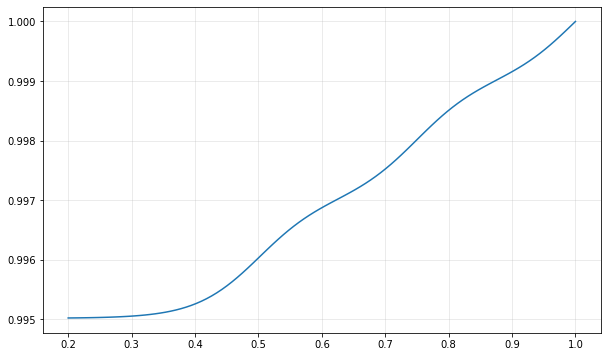

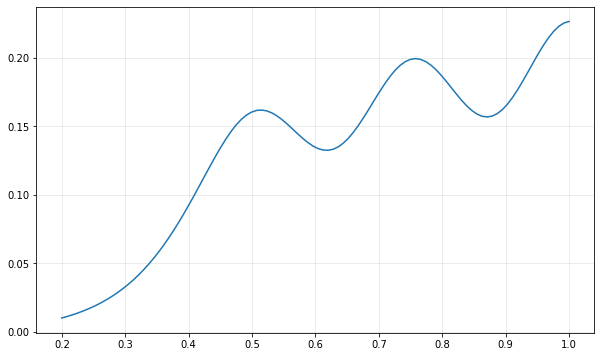

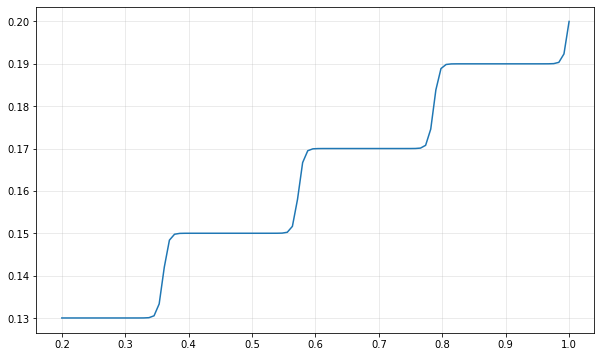

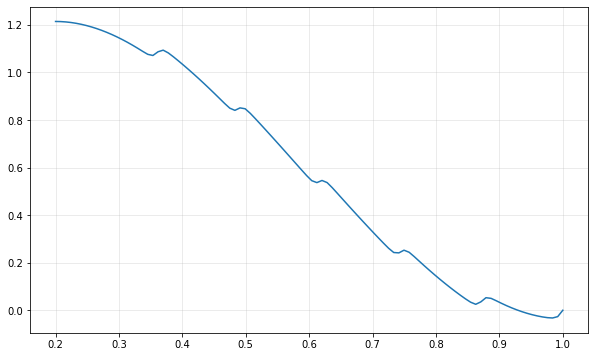

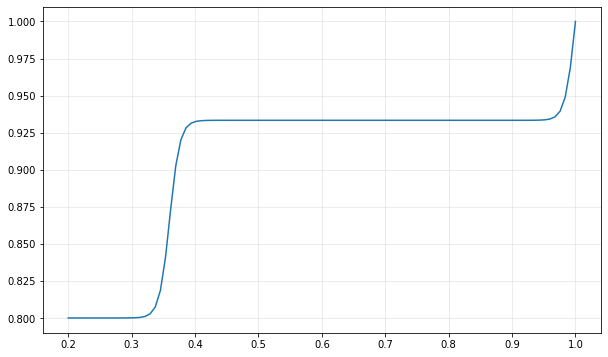

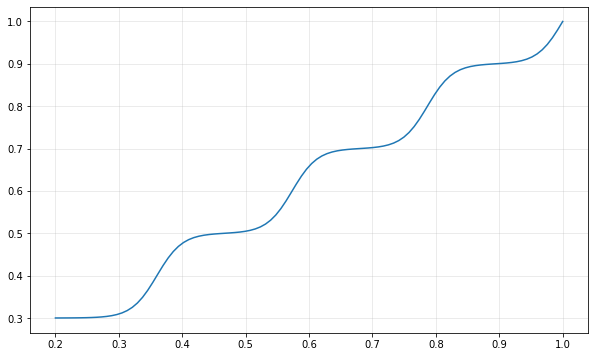

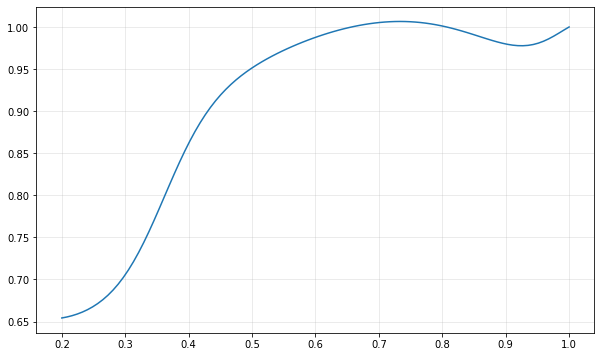

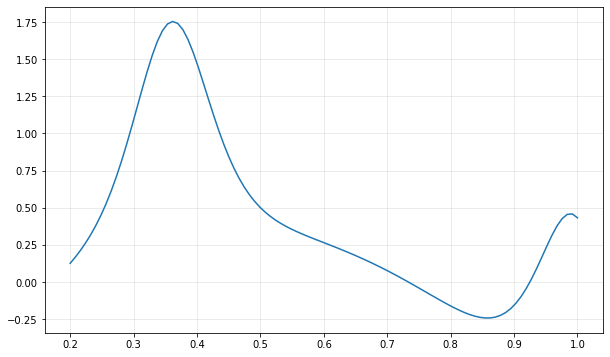

speed of sound = 
)
0.001⋅tanh(10⋅r - 10) + 0.001⋅tanh(10⋅r - 7.5) + 0.001⋅tanh(10⋅r - 5.0) + 0.99
8013476497586


In [3]:
# Generating manufactured solutions

%run 03-mms-mean-flow.ipynb

In [4]:
# import functions to substitute the manufactured solutions into the LEE
%run 04-source-substitution-function.ipynb

### Defining Linearized Euler Equation (LEE) Source Terms

Initially the source terms were defined without mention of the indices of the matrices they make up. In other words, there was no fore sight on the fact that these source terms are sums 
of the elements within A,B, and X. To investigate the source terms in greater detail, the FORTRAN code that calls the source terms will output the terms within the source term and then sum them, instead of just their sum.

### Eigenvalue Decomposition


$$ [A]{x} = \lambda [B] {x} $$

which can be rearranged as,

$$ [A]{x} - \lambda [B] {x} = 0$$

Here, $x$ is an eigenvector composed of the perturbation variables, $v_r,v_{\theta},v_x,p$ and $\lambda$ is the associated eigenvalue, (Note: $\lambda = -i \bar{\gamma}$)

Writing this out we obtain ....

Linear System of Equations:
\begin{equation}
-
i \left(
\frac{k}{A} - \frac{m}{r} M_{\theta}
\right)
v_r 
-
\frac{2}{r} M_{\theta} v_{\theta} 
+
\frac{dp}{dr} 
+
\frac{(\kappa - 1)}{r} M_{\theta}^2 p
-
\lambda M_x v_r =S_1
\end{equation}

Using matrix notation,

\begin{equation}
A_{11}
x_1 
-
A_{12} x_2 
+
A_{14} x_4
-
\lambda B_{11} x_1 = S_1
\end{equation}

But $A_{14}$ and $A_{41}$ in Kousen's paper only has the derivative operator. Since I am currntly writing the matrix out term by term and not doing the matrix math to obtain the symbolic expressions, I will define $A_{14}$ with $dp/dr$ and $A_{41}$ with $dv_r/dr$
Similarly,
\begin{align}
A_{21} x_1 &-
A_{22} x_2 +
A_{24} x_4 &-
\lambda B_{22} x_2 &= S_2 \\
A_{31} x_1 &-
A_{33} x_3 &-
\lambda (B_{33} x_3 + B_{34} x_4) &= S_3\\
A_{41} x_1 &+
A_{42} x_2 +
A_{44} x_4 &- 
\lambda (B_{33} x_3 + B_{44} x_4) &= S_4
\end{align}
Now we can begin looking at the source terms, term by term. They each should also converge at a known rate

In [5]:
%run 05-source-term-system-of-equations.ipynb

⎡                two                                                          
⎢  Mₜ⋅two⋅vₜ   Mₜ   ⋅p⋅(1.4 - one)                ⎛  Mₜ⋅m        1⎞  i⋅m⋅p    
⎢- ───────── + ─────────────────── + dp_dr - i⋅vᵣ⋅⎜- ──── - Mₓ + ─⎟, ───── - i
⎣      r                r                         ⎝   r          A⎠    r      

                           ⎛       three                      ⎞               
    ⎛  Mₜ⋅m        1⎞      ⎜Mₜ   Mₜ     ⋅(1.4 - one)          ⎟               
⋅vₜ⋅⎜- ──── - Mₓ + ─⎟ + vᵣ⋅⎜── + ─────────────────── + dM_t_dr⎟, i⋅one⋅p - i⋅v
    ⎝   r          A⎠      ⎝r           r⋅two                 ⎠               

                         ⎛  two                         ⎞                     
  ⎛  Mₜ⋅m        1⎞      ⎜Mₜ   ⋅Mₓ⋅(1.4 - one)          ⎟            i⋅m⋅vₜ   
ₓ⋅⎜- ──── - Mₓ + ─⎟ + vᵣ⋅⎜──────────────────── + dM_x_dr⎟, dv_r_dr + ────── + 
  ⎝   r          A⎠      ⎝       r⋅two                  ⎠              r      

                                      ⎛  two     

Now lets get these source terms by using the matrix form of the equations and see if they're
equal

In [6]:
%run 06-source-term-matrix-equation.ipynb

In [7]:
# Checking if the matrix expressions equal the linear system of equations
print(S[0].equals(SS[0]))
print(S[1].equals(SS[1]))
print(S[2].equals(SS[2]))
print(S[3].equals(SS[3]))

True
True
True
True


In [8]:
%run 07-source-term-comparison.ipynb

True
True
True
True


In [9]:
for i in range(len(S)):
    S[i] = SourceSubstitution(S[i], \
                       A_analytic         , \
                       M_t_analytic   , \
                       M_x_analytic     , \
                       v_r_analytic     , \
                       v_t_analytic     , \
                       v_x_analytic     , \
                       p_analytic       , \
                       dp_dr_analytic   , \
                       dv_r_dr_analytic , \
                       dM_x_dr_analytic , \
                       dM_t_dr_analytic , \
                       )

for i in range(len(A_times_x[:,0])):
    for j in range(len(A_times_x[0,:])):
        A_times_x[i,j] = SourceSubstitution(\
                       A_times_x[i,j], \
                       A_analytic         , \
                       M_t_analytic   , \
                       M_x_analytic     , \
                       v_r_analytic     , \
                       v_t_analytic     , \
                       v_x_analytic     , \
                       p_analytic       , \
                       dp_dr_analytic   , \
                       dv_r_dr_analytic , \
                       dM_x_dr_analytic , \
                       dM_t_dr_analytic , \
                                      ) 
        lambda_B_times_x[i,j] = SourceSubstitution(\
                       lambda_B_times_x[i,j], \
                       A_analytic         , \
                       M_t_analytic   , \
                       M_x_analytic     , \
                       v_r_analytic     , \
                       v_t_analytic     , \
                       v_x_analytic     , \
                       p_analytic       , \
                       dp_dr_analytic   , \
                       dv_r_dr_analytic , \
                       dM_x_dr_analytic , \
                       dM_t_dr_analytic , \
                                         )


In [10]:
%run create-fortran-scripts/create-fortran-file-sound-speed.ipynb

In [11]:
%run create-fortran-scripts/create-fortran-file-perturbation-variables.ipynb

In [12]:
S_1 = S[0]
S_2 = S[1]
S_3 = S[2]
S_4 = S[3]
%run create-fortran-scripts/create-fortran-file-LEE-source-terms.ipynb

In [13]:
%run create-fortran-scripts/create-fortran-file-LEE-source-terms-components.ipynb